# Indian Startup Study

In [120]:
#importing basic libraries required

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import plotly 
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [121]:
data=pd.read_csv('startup_funding.csv', index_col=0)

In [122]:
data.shape

(3044, 9)

In [123]:
data.head()

,Date dd/mm/yyyy,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09-01-2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [124]:
data.columns

Index(['Date dd/mm/yyyy', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentnType', 'Amount in USD',
       'Remarks'],
      dtype='object')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date dd/mm/yyyy   3044 non-null   object
 1   StartupName       3044 non-null   object
 2   IndustryVertical  2873 non-null   object
 3   SubVertical       2108 non-null   object
 4   CityLocation      2864 non-null   object
 5   InvestorsName     3020 non-null   object
 6   InvestmentnType   3040 non-null   object
 7   Amount in USD     2084 non-null   object
 8   Remarks           419 non-null    object
dtypes: object(9)
memory usage: 237.8+ KB


### Data Cleaning

In [126]:
data.drop("Remarks", axis=1, inplace=True)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date dd/mm/yyyy   3044 non-null   object
 1   StartupName       3044 non-null   object
 2   IndustryVertical  2873 non-null   object
 3   SubVertical       2108 non-null   object
 4   CityLocation      2864 non-null   object
 5   InvestorsName     3020 non-null   object
 6   InvestmentnType   3040 non-null   object
 7   Amount in USD     2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [128]:
data.isnull().sum()

Date dd/mm/yyyy       0
StartupName           0
IndustryVertical    171
SubVertical         936
CityLocation        180
InvestorsName        24
InvestmentnType       4
Amount in USD       960
dtype: int64

In [129]:
data=data.dropna()

In [130]:
data.isnull().sum()

Date dd/mm/yyyy     0
StartupName         0
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestorsName       0
InvestmentnType     0
Amount in USD       0
dtype: int64

In [131]:
data["Amount in USD"]=data["Amount in USD"].str.replace(",","")
data["Amount in USD"]=data["Amount in USD"].str.replace("undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("unknown","")
data["Amount in USD"]=data["Amount in USD"].str.replace("unknown","")
data["Amount in USD"]=data["Amount in USD"].str.replace("Undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("+","")


In [132]:
data["Amount in USD"]=pd.to_numeric(data["Amount in USD"])

In [133]:
data.shape

(1406, 8)

In [134]:
data.describe()

,Amount in USD
count,1.399000e+03
mean,2.047457e+07
std,1.419738e+08
min,1.800000e+04
25%,5.000000e+05
50%,2.000000e+06
75%,8.024197e+06
max,3.900000e+09


In [135]:
data=data.sort_values(by=["Amount in USD"],ascending=False).reset_index()

In [136]:
data.head()

,Sr No,Date dd/mm/yyyy,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,Amount in USD
0,61,27-08-2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
1,652,11-08-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
2,967,21-03-2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,831,18-05-2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
4,32,25-11-2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09


## Comparing startups on the basis of the fundings they received

In [137]:
data=data.sort_values(by=["Amount in USD"],ascending=True).reset_index()
data_botfun=data[0:20]
data_botfun[["StartupName","Amount in USD"]]


,StartupName,Amount in USD
0,Maptags,18000.0
1,Cloudrino,22500.0
2,SoundSurround,22500.0
3,Gamooz,22500.0
4,Strike,22500.0
5,Newspatrolling,25000.0
6,VST Travels,27000.0
7,Woodpie,30000.0
8,Book Servicing,30000.0
9,Perfumery,30000.0


<AxesSubplot:xlabel='Amount in USD', ylabel='StartupName'>

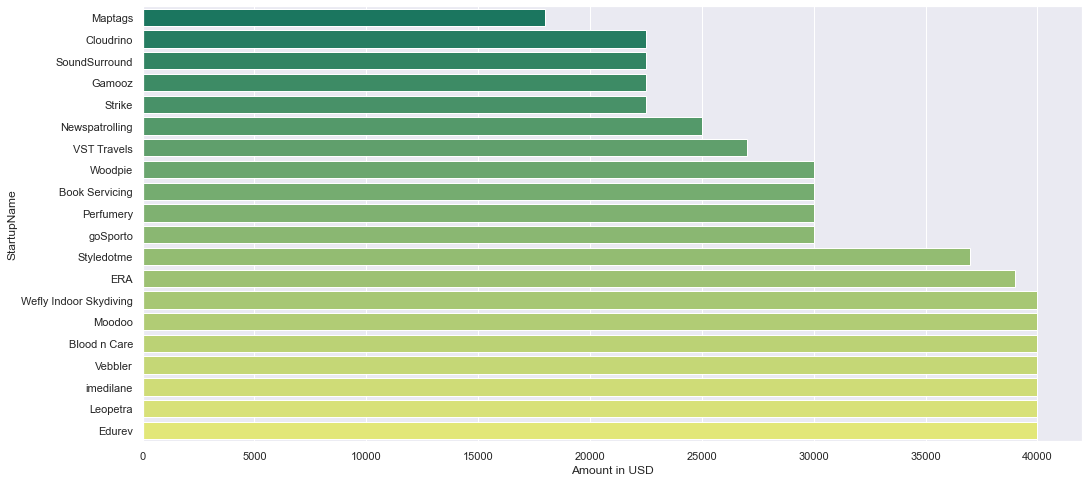

In [138]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(data=data_botfun,y="StartupName",x="Amount in USD",palette="summer")

In [139]:
data=data.sort_values(by=["Amount in USD"],ascending=False).reset_index()

In [140]:
data.head()

,level_0,index,Sr No,Date dd/mm/yyyy,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,Amount in USD
0,1398,0,61,27-08-2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
1,1397,1,652,11-08-2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
2,1396,2,967,21-03-2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,1395,3,831,18-05-2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
4,1394,4,32,25-11-2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09


In [141]:
data_topfun=data[0:20]

<AxesSubplot:xlabel='Amount in USD', ylabel='StartupName'>

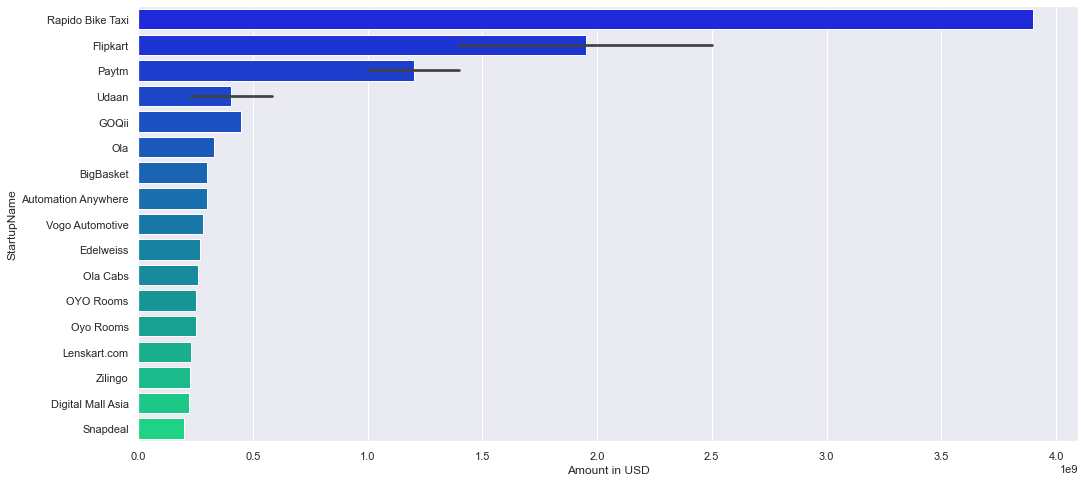

In [142]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(data=data_topfun,y="StartupName",x="Amount in USD",palette="winter")

## Checking in which investment type the investors are interested

In [143]:
data_INtype=data["InvestmentnType"].value_counts()[0:20].reset_index()

In [144]:
data_INtype

,index,InvestmentnType
0,Private Equity,718
1,Seed Funding,439
2,Seed/ Angel Funding,45
3,Seed / Angel Funding,32
4,Series A,24
5,Debt Funding,22
6,Series B,20
7,Seed/Angel Funding,17
8,Series C,14
9,Series D,12


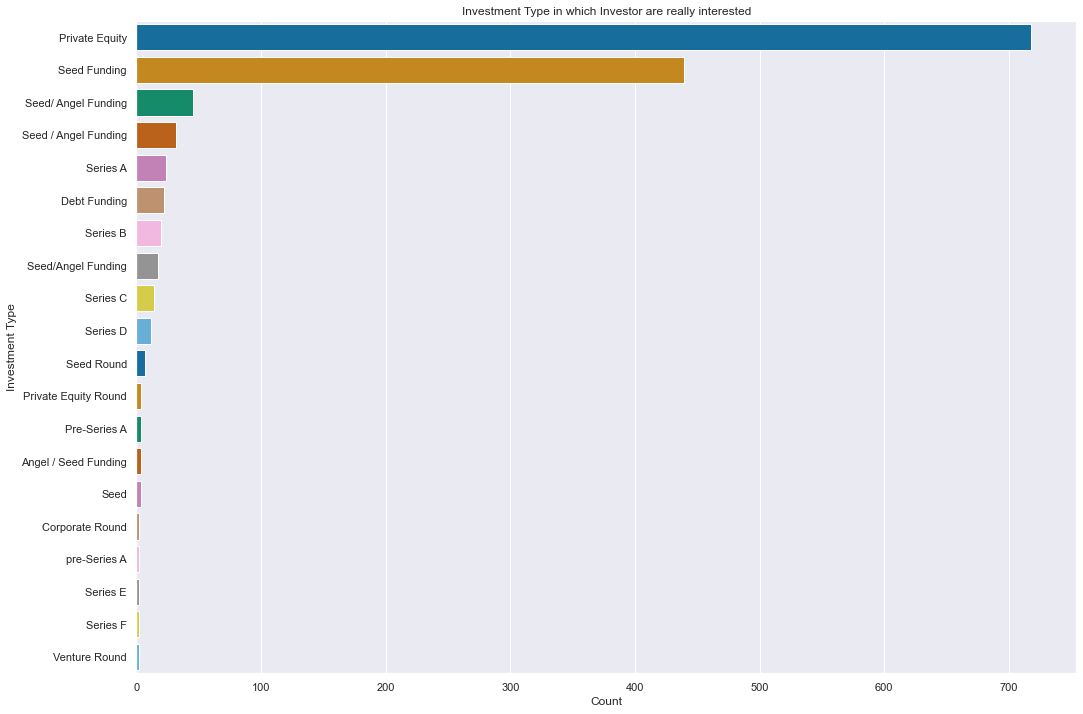

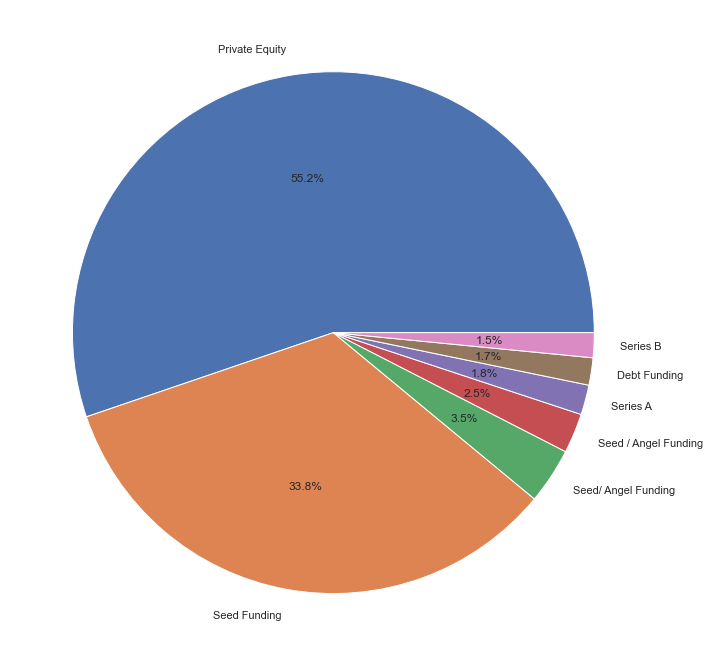

In [145]:
plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
sns.barplot(data=data_INtype,y="index",x="InvestmentnType",palette="colorblind")
plt.title("Investment Type in which Investor are really interested")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()
plt.figure(figsize=(15,12))
plt.pie(data_INtype["InvestmentnType"][0:7],labels=data_INtype["index"][0:7],autopct="%0.1f%%")
plt.show()

#### Maximum investor are interested in Private equity, Seed funding and Seed / Angel Funding as their Investment Type

## Lets check the Industry Vertical in which investor are interested

In [146]:
data_indver=data["IndustryVertical"].value_counts().reset_index()[0:10]

In [147]:
data_indver

,index,IndustryVertical
0,Consumer Internet,582
1,Technology,309
2,eCommerce,125
3,Finance,53
4,Healthcare,43
5,ECommerce,37
6,E-Commerce,24
7,Logistics,23
8,Education,18
9,Food & Beverage,15


Consumer Internet    582
Technology           309
eCommerce            125
Finance               53
Healthcare            43
ECommerce             37
E-Commerce            24
Logistics             23
Education             18
Food & Beverage       15
Name: IndustryVertical, dtype: int64


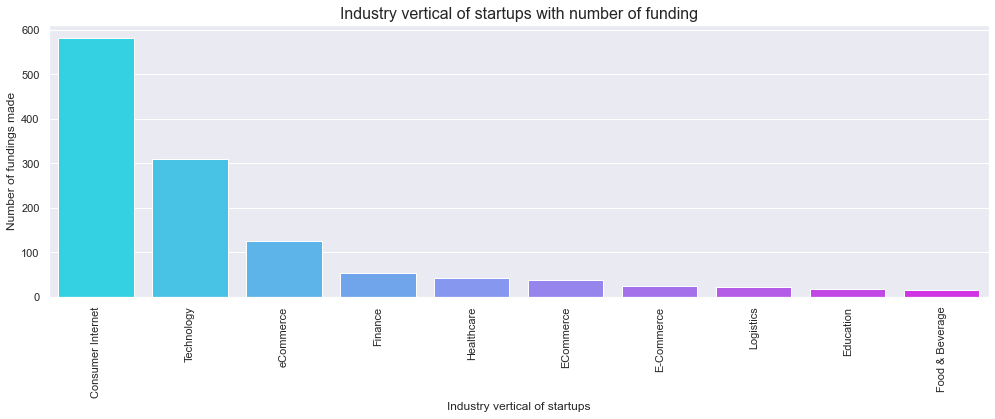

In [148]:
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()


#### Investor have been funding Consumer Internet and Technology

Online Pharmacy                       5
Online Lending                        5
Education                             5
Online lending platform               4
Online Learning Platform              4
Online Education Platform             4
Food Delivery Platform                4
Online Food Delivery                  4
Agri-tech                             3
ECommerce Marketplace                 3
SaaS                                  3
Non-Banking Financial Company         3
E-learning                            3
Online Furniture Store                3
Online Marketplace                    3
Online Food Delivery Platform         3
Logistics                             3
Online Insurance Aggregator           3
Online Payment Gateway                2
Mobile Wallet & ECommerce platform    2
Name: SubVertical, dtype: int64


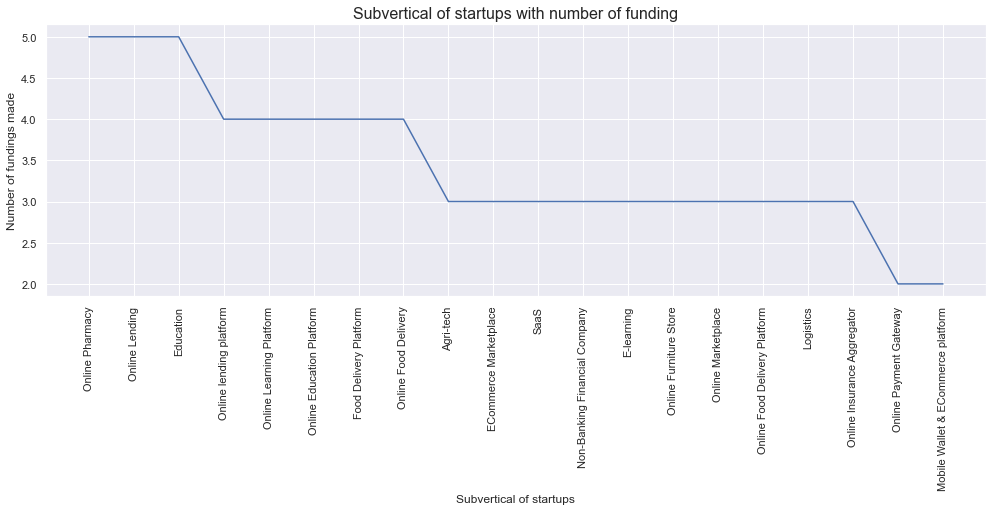

In [149]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'pastel')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In [150]:
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'


In [151]:
data_un=data[data["InvestorsName"]!="Undisclosed Investors"]
data_inves=data_un["InvestorsName"].value_counts()[0:10].reset_index()

### Now lets check who are the top 20 investors excluding the Undisclosed Investor

In [152]:
data_inves

,index,InvestorsName
0,Kalaari Capital,9
1,Info Edge (India) Ltd,8
2,Brand Capital,8
3,Trifecta Capital,8
4,Accel Partners,7
5,Venture Catalysts,7
6,Indian Angel Network,7
7,The Chennai Angels,5
8,Tiger Global Management,5
9,Nexus Venture Partners,4


Text(0, 0.5, 'InvestorsName')

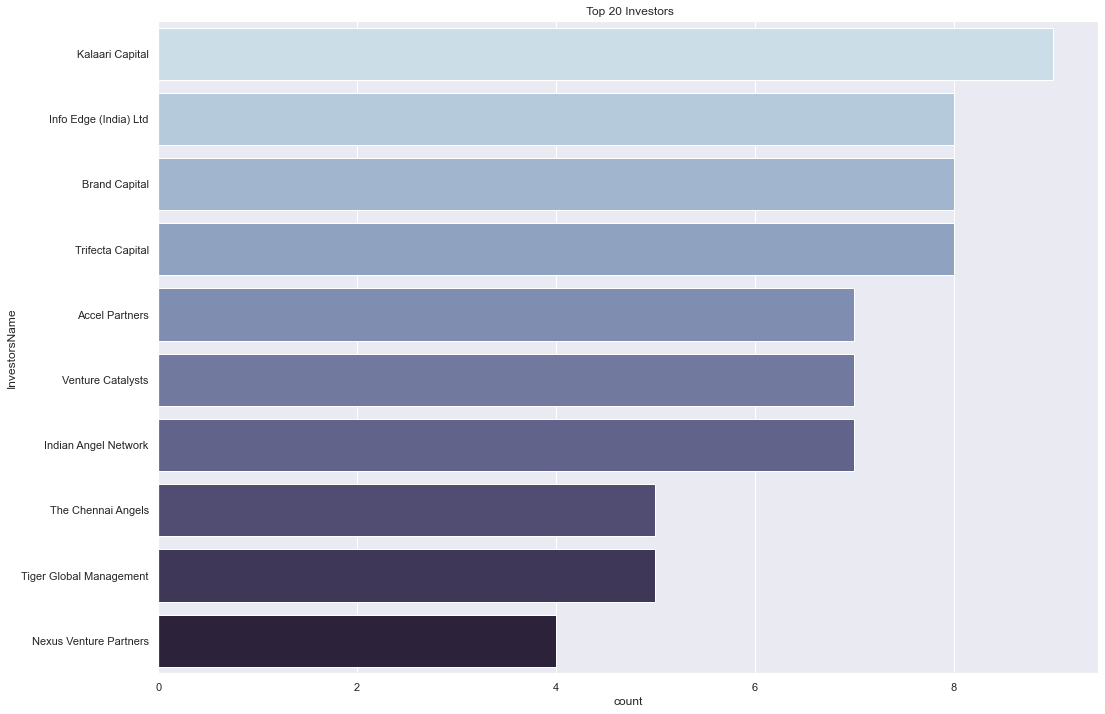

In [153]:
plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
sns.barplot(data=data_inves,y="index",x="InvestorsName",palette="ch:s=.25,rot=-.25")
plt.title(" Top 20 Investors")
plt.xlabel("count")
plt.ylabel("InvestorsName")

### Now lets check who are the top 20 investors including the Undisclosed Investor

In [154]:
# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)


In [155]:
investors

Undisclosed Investors      72
Kalaari Capital             9
Info Edge (India) Ltd       8
Trifecta Capital            8
Brand Capital               8
Accel Partners              7
Indian Angel Network        7
Venture Catalysts           7
Tiger Global Management     5
The Chennai Angels          5
Name: InvestorsName, dtype: int64

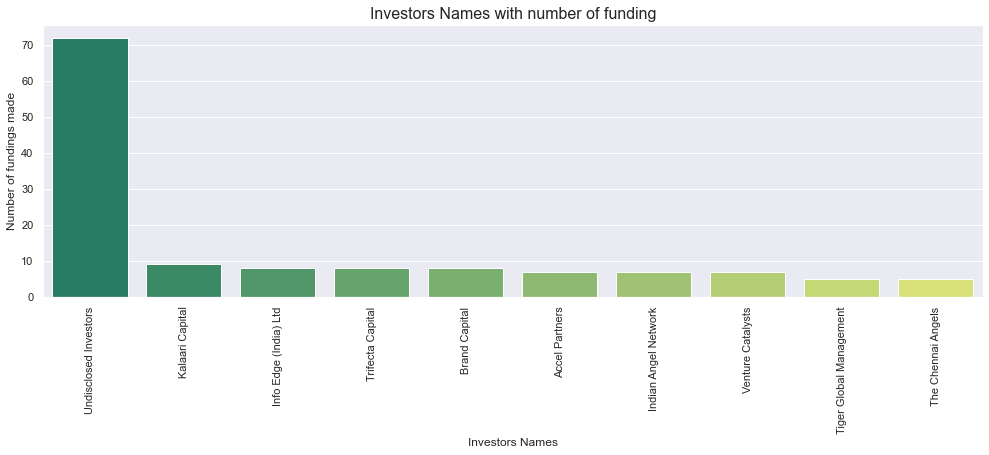

In [156]:
# lets plot the data

sns.barplot(investors.index, investors.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## Comparing city locations with number of funding

In [157]:
data['CityLocation'].value_counts()

Bangalore            319
Mumbai               277
New Delhi            161
Gurgaon              135
Bengaluru            124
                    ... 
Panaji                 1
Delhi & Cambridge      1
Lucknow                1
Taramani               1
New Delhi / US         1
Name: CityLocation, Length: 67, dtype: int64

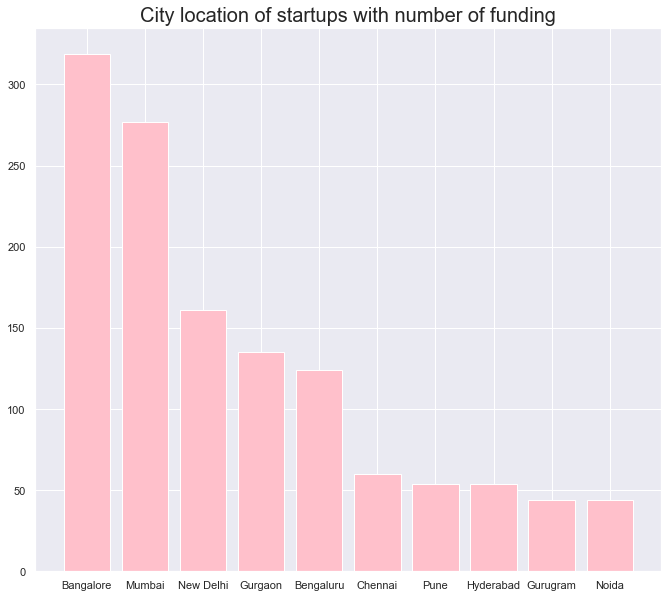

In [158]:
plt.figure(figsize=(10,10))
plt.title('City location of startups with number of funding', fontsize = 20)
plt.bar(list(data['CityLocation'].value_counts()[0:10].keys()),list(data['CityLocation'].value_counts()[0:10]), color='pink')
plt.show()  


<AxesSubplot:ylabel='InvestmentnType'>

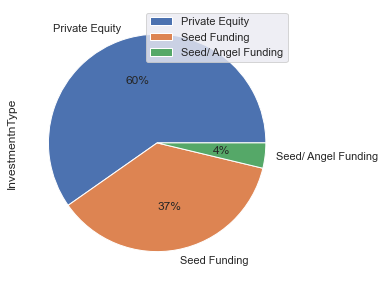

In [159]:
data['InvestmentnType'].value_counts()[0:3].plot(kind='pie', legend=True, autopct='%0.f%%')

In [160]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["Amount in USD"].dropna().sort_values().min())

Minimum funding to a Startups is :  18000.0


In [161]:
# lets check the startups with least funding
data[['Amount in USD','StartupName']].sort_values(by = 'Amount in USD', ascending = True).head(5)

,Amount in USD,StartupName
1398,18000.0,Maptags
1394,22500.0,Gamooz
1397,22500.0,Strike
1396,22500.0,Cloudrino
1395,22500.0,SoundSurround


In [162]:
# Average Funding
print("On Average indian startups got funding of : ", data["Amount in USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  20474571.147248033


## Lets check the no. of funding each startups got

Total startups funded :  1202
Swiggy      5
Ola Cabs    5
Toppr       4
Flipkart    4
Meesho      4
Nykaa       4
Uniphore    4
Paytm       4
Udaan       4
Medinfi     4
Name: StartupName, dtype: int64


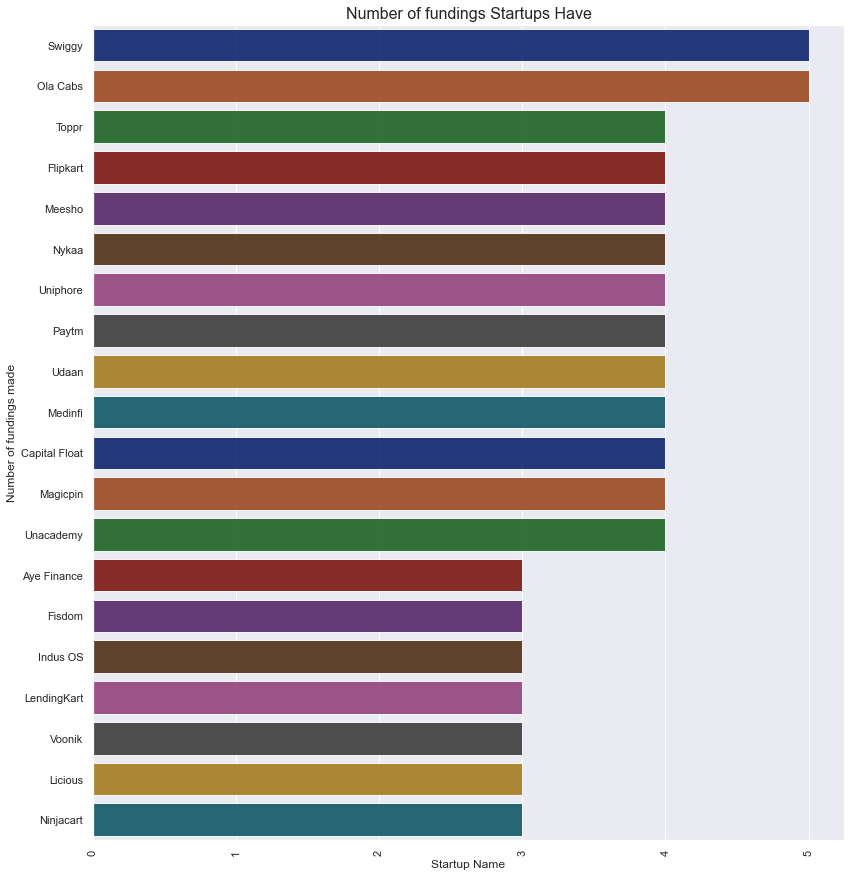

In [163]:
print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'dark')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

# Employee Promotion

In [164]:
# lets import all the required libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [165]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [166]:
train.shape

(54808, 14)

In [167]:
test.shape

(23490, 13)

In [168]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [169]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [170]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [171]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [172]:
# values in Departments

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [173]:
# values in Region

train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [174]:
# lets check descriptive statistics for numerical columns
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [175]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


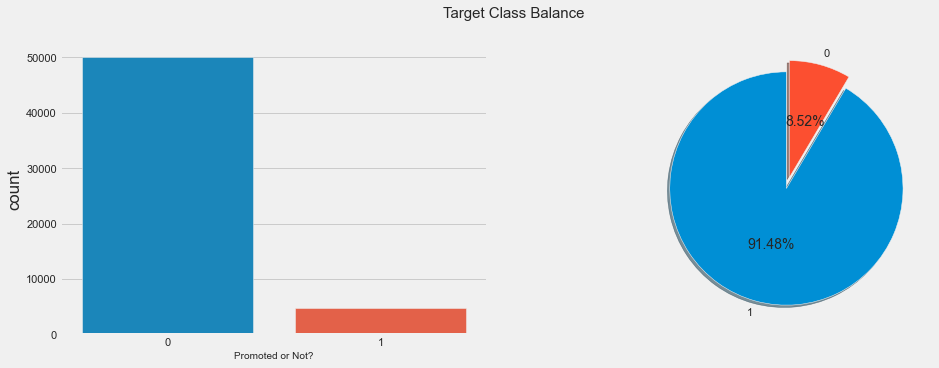

In [176]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [177]:
# missing values in training data set


train_total = train.isnull().sum()

train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

test_total = test.isnull().sum()

test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

In [178]:
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [179]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [180]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [181]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


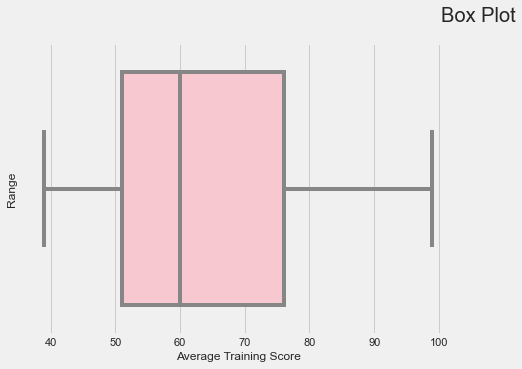

In [182]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'pink')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

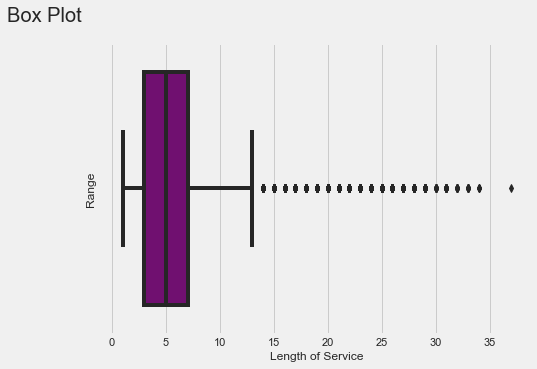

In [183]:
# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'purple')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [184]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]

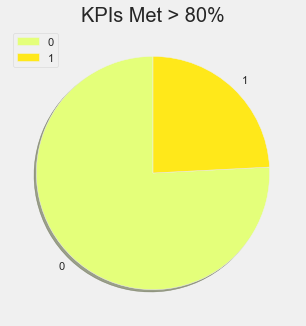

In [185]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)


plt.legend()
plt.show()

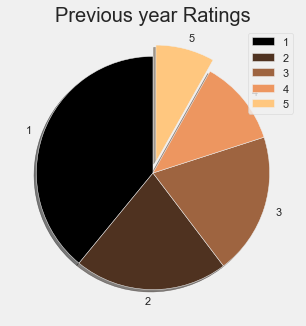

In [186]:
# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

plt.legend()
plt.show()

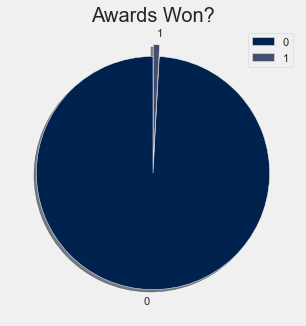

In [187]:
# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.cividis(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)

plt.legend()
plt.show()

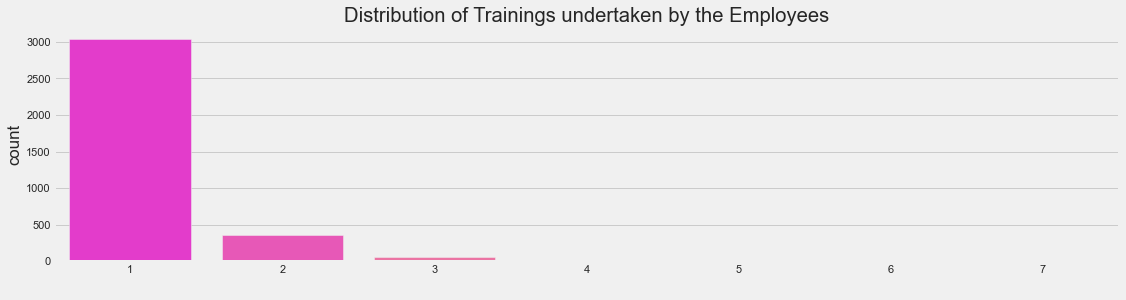

In [188]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()



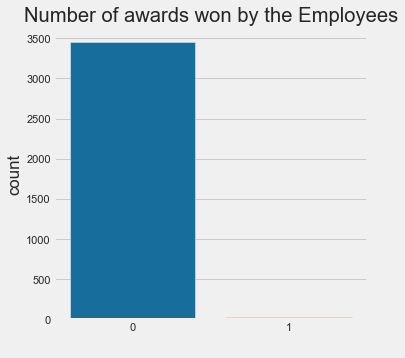

In [189]:
# lets check the number of awards won by the employees

plt.rcParams['figure.figsize'] = (5, 5)
sns.countplot(train['awards_won?'], palette = 'colorblind')
plt.xlabel(' ', fontsize = 14)
plt.title('Number of awards won by the Employees')
plt.show()

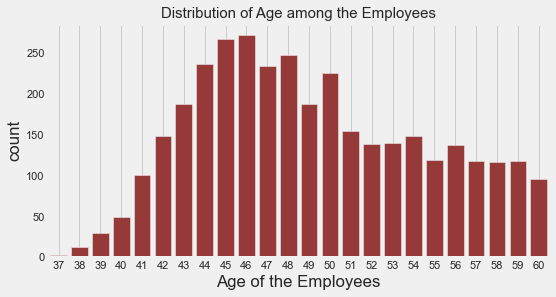

In [190]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
sns.countplot(train['age'], color = 'brown')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

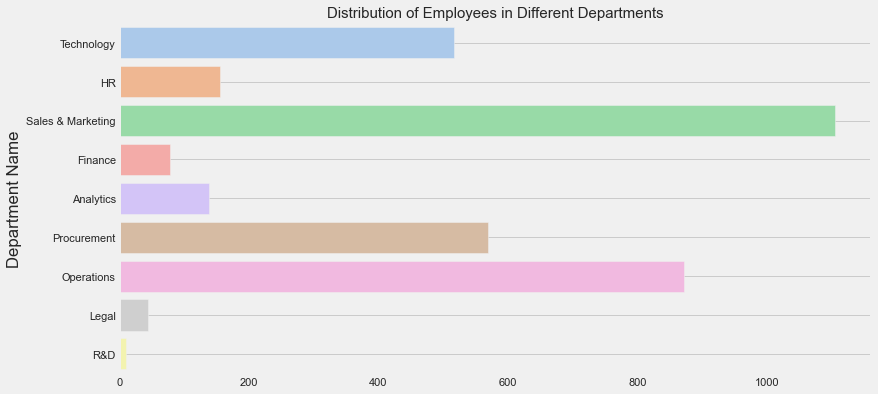

In [191]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'pastel', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

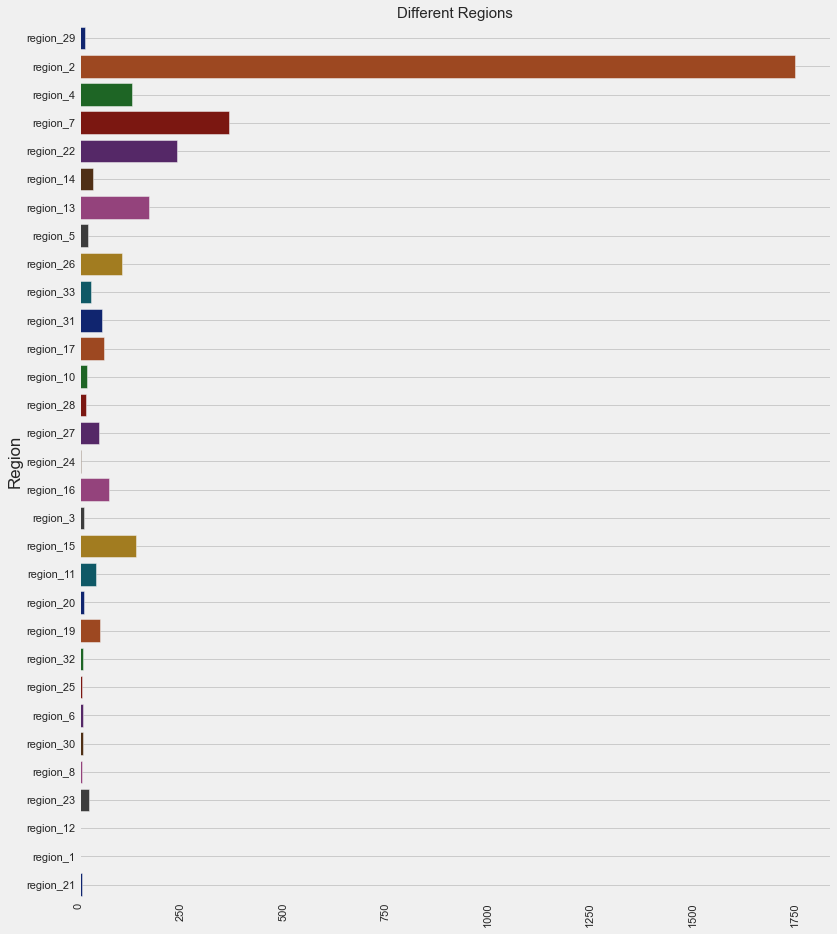

In [192]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'dark', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

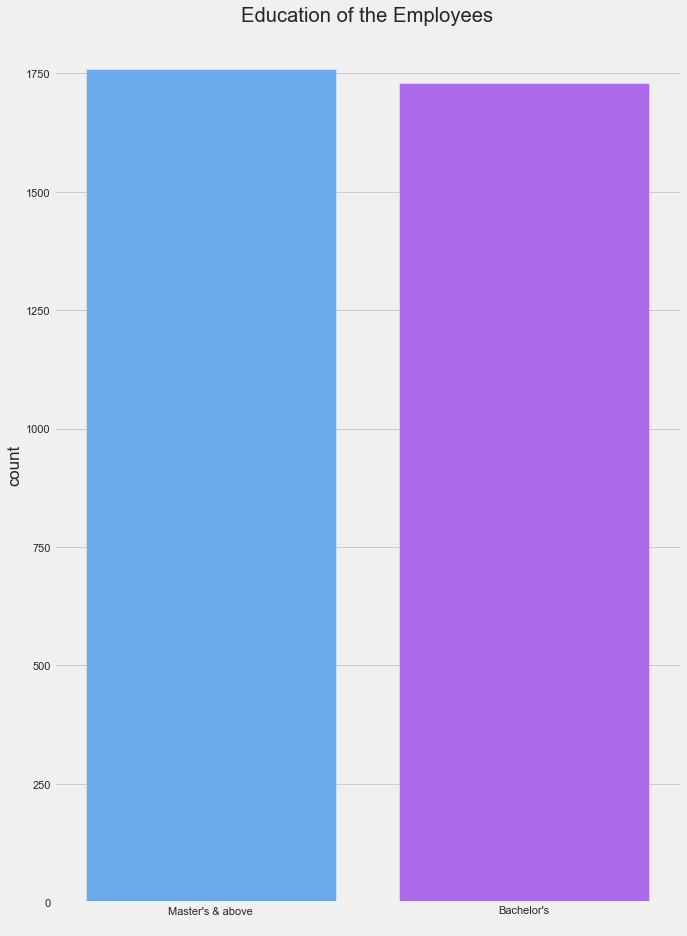

In [193]:
plt.rcParams['figure.figsize'] = (10, 15)
sns.countplot(train['education'], palette = 'cool')
plt.xlabel(' ', fontsize = 10)
plt.title('Education of the Employees')
plt.show()

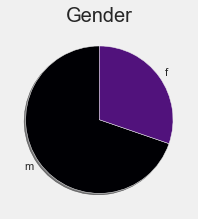

In [194]:
# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.magma(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

plt.show()

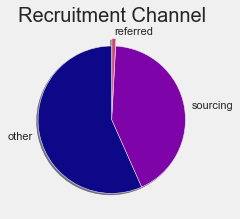

In [195]:
# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.plasma(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

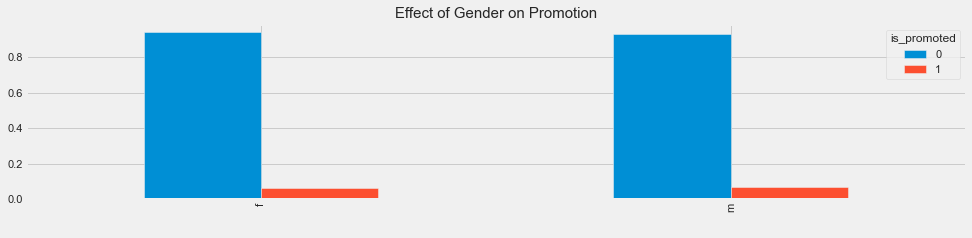

In [196]:
# Lets compare the Gender Gap in the promotion

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

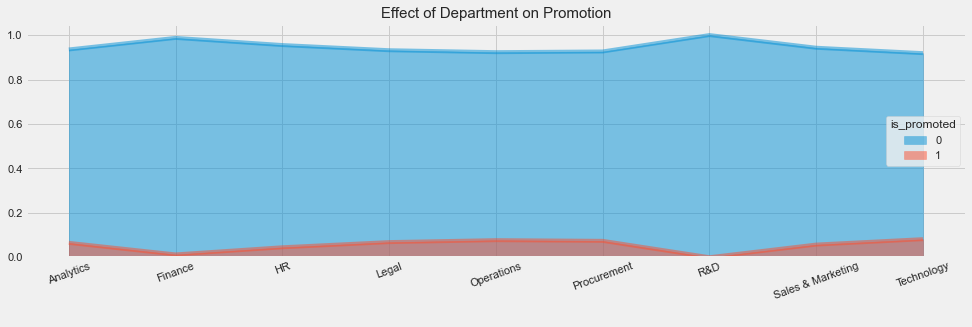

In [197]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

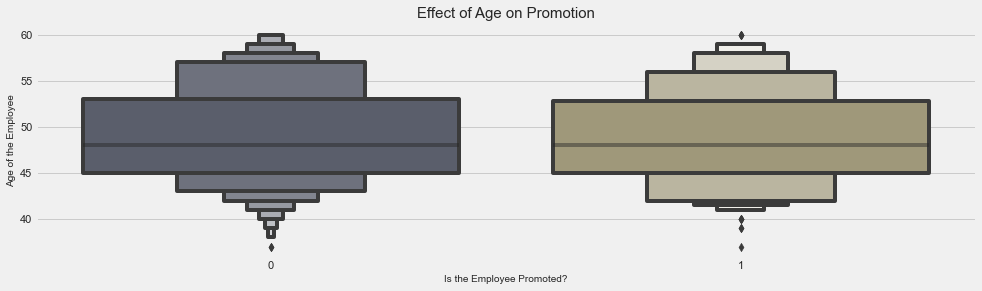

In [198]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'cividis')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

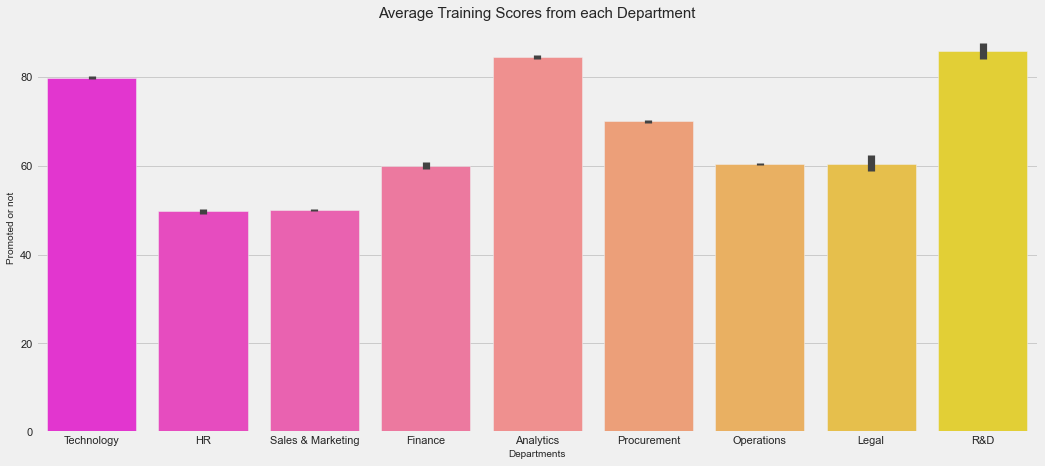

In [199]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], palette = 'spring')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

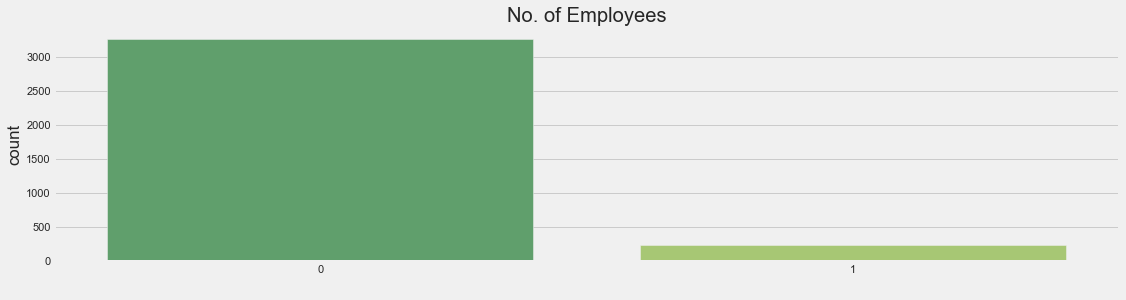

In [200]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['is_promoted'], palette = 'summer')
plt.xlabel(' ', fontsize = 14)
plt.title('No. of Employees')
plt.show()

## Multivariate Analysis

### Heat Map

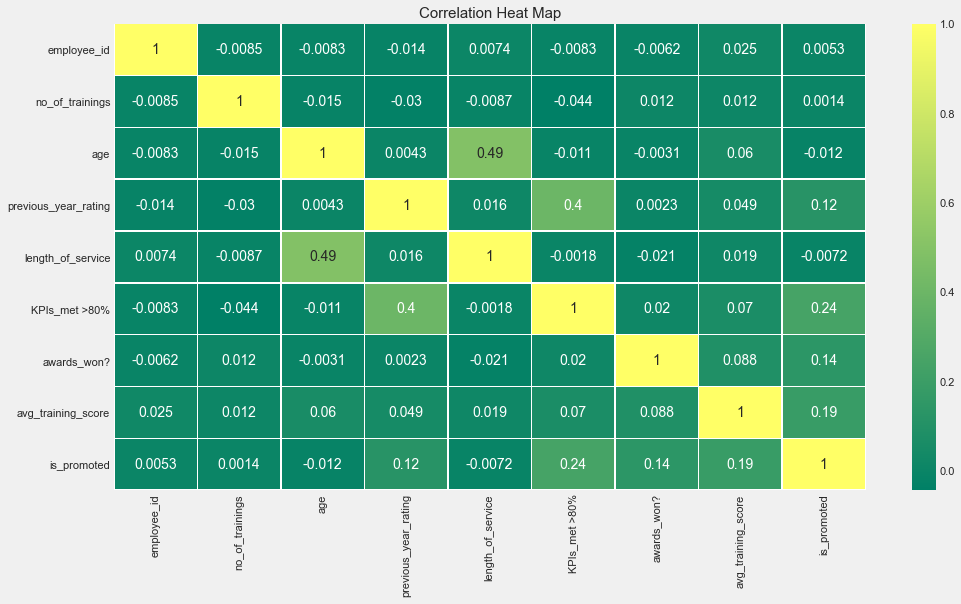

In [201]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'summer')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

### Lets check the relation of Departments and Promotions when they won awards ?


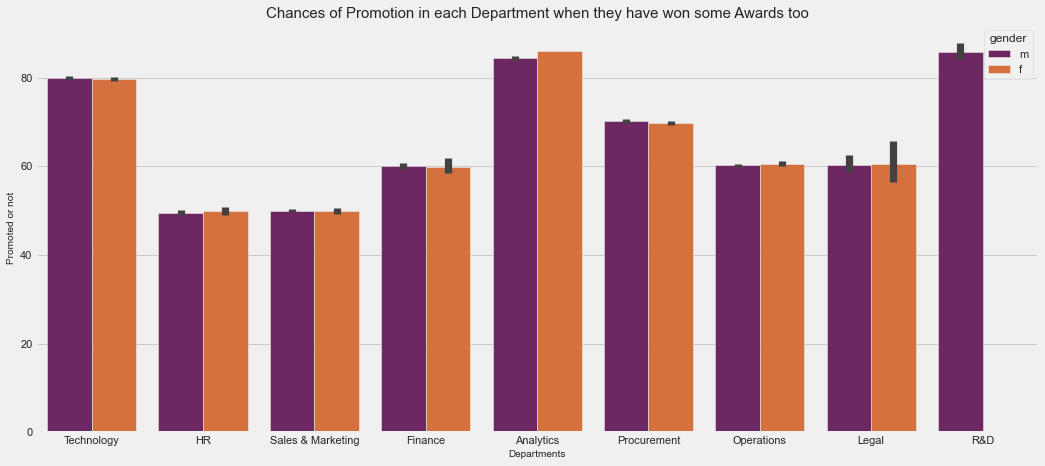

In [202]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'inferno')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [203]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [204]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [205]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


In [206]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3489, 13)
After Deletion of the above two rows : (3489, 13)


In [207]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [208]:
# lets check the data after encoding
train.head(5)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47
74,7,2,1,1,50,3.0,14,0,0,52,0,3.0,52
99,1,3,1,1,60,5.0,17,0,0,59,0,5.0,59


## Splitting the Data


In [210]:
#lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


## Resampling

In [211]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [212]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


In [213]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


In [214]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [215]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9994239631336406
Testing Accuracy : 0.9639016897081413


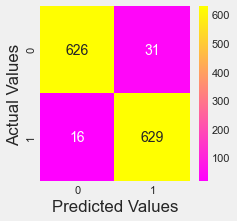

In [216]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'spring', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [217]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       657
           1       0.95      0.98      0.96       645

    accuracy                           0.96      1302
   macro avg       0.96      0.96      0.96      1302
weighted avg       0.96      0.96      0.96      1302



In [218]:
y_pred[0:]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## This is the end. 
## Here we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.**
## We also used certain other features also along with it like multivariate analysis and so on.
## We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model
